# Notebook to generate selectivity plots.

This notebook requires the cached selectivity data in
`../../../cache/phys_processing/selectivity`. See
`../../../phys_processing/selectivity` for details of how to generate this.

This notebook generates selectivity plots for both monkeys for the Ring
datasets, and saves these plots to `./plots/`.

In [1]:
"""Imports."""

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

# Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

In [2]:
"""Load data."""

_DATA_DIR = Path('../../../cache/phys_processing/selectivity/')
_MEAN_FIRING_RATE_THRESHOLD = 1.

# Load data
dataframes = []
for subject_dir in _DATA_DIR.iterdir():
    if subject_dir.name.startswith('.'):
        continue
    for session_dir in subject_dir.iterdir():
        if session_dir.name.startswith('.'):
            continue
        new_df = pd.read_csv(session_dir / 'units.csv')
        dataframes.append(new_df)
df = pd.concat(dataframes).reset_index(drop=True)

# Remove units with too low mean firing rate
df = df[
    (df["task"] == "ring") &
    (df["mean_firing_rate"] > _MEAN_FIRING_RATE_THRESHOLD)
]
df["p_significant"] = (
    (df['Position p-value'] < 0.05) |
    (df['Identity p-value'] < 0.05)
)

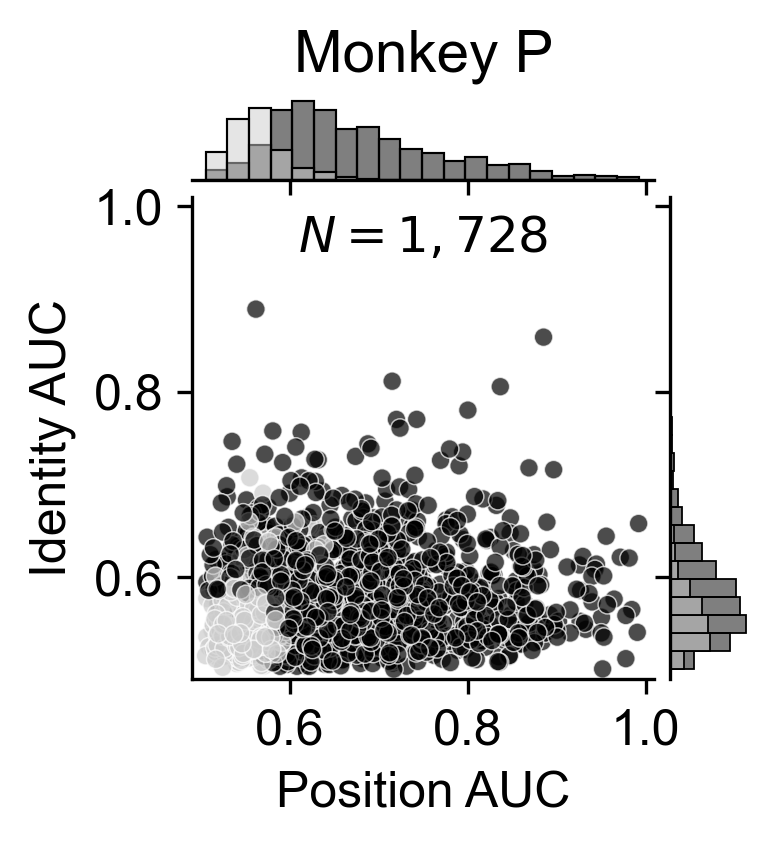

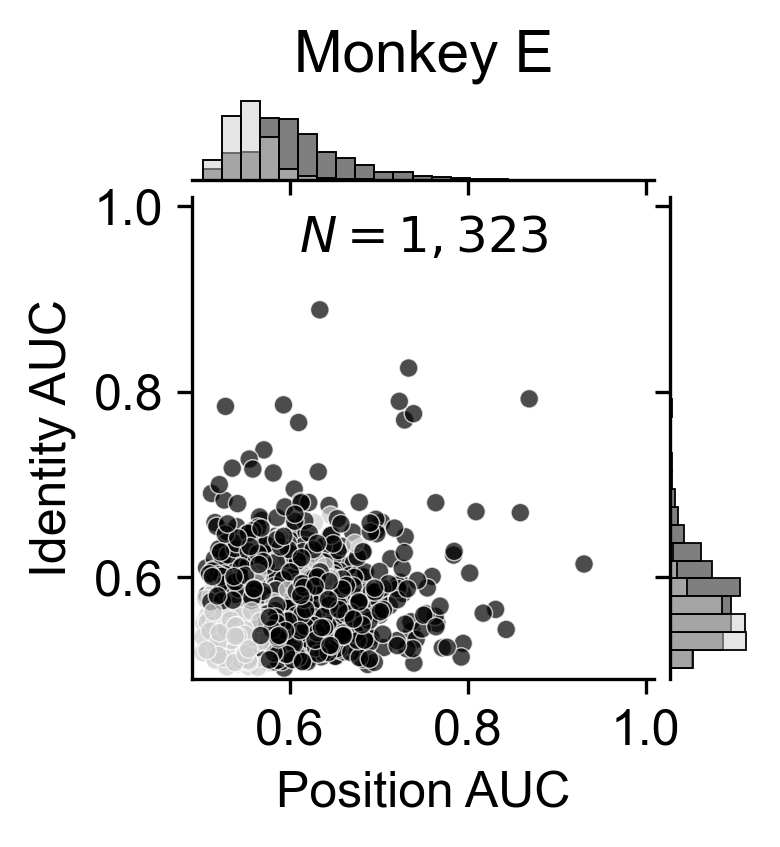

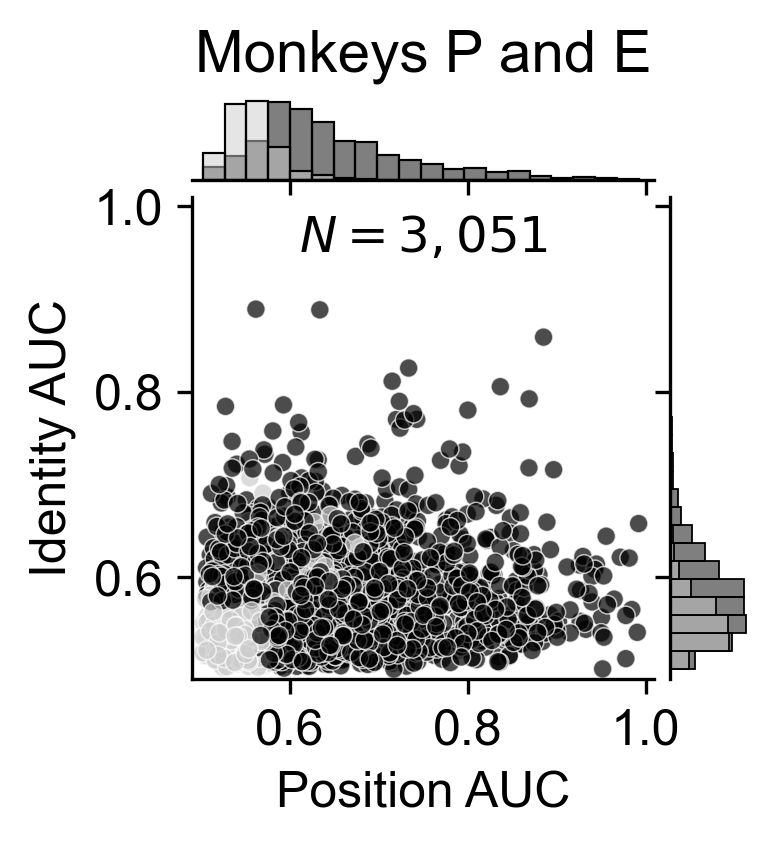

In [9]:
"""Scatterplot position and identity AUC values."""

SUBJECTS = [('Perle',), ('Elgar',), ('Perle', 'Elgar')]

for subjects in SUBJECTS:
    df_subjects = df[df['subject'].isin(subjects)]
    g = sns.JointGrid(
        data=df_subjects,
        x="Position AUC",
        y="Identity AUC",
        xlim=(0.49, 1.01),
        ylim=(0.49, 1.01),
        height=2.7,
    )
    sns.scatterplot(
        ax=g.ax_joint,
        data=df_subjects,
        x='Position AUC',
        y='Identity AUC',
        s=20,
        alpha=0.7,
        hue="p_significant",
        palette={True: (0, 0, 0), False: (0.8, 0.8, 0.8)},
        legend=False,
    )
    sns.histplot(
        ax=g.ax_marg_x,
        data=df_subjects,
        x="Position AUC",
        hue="p_significant",
        palette={True: (0, 0, 0), False: (0.8, 0.8, 0.8)},
        kde=False,
        bins=20,
        legend=False,
    )
    sns.histplot(
        ax=g.ax_marg_y,
        data=df_subjects,
        y="Identity AUC",
        hue="p_significant",
        palette={True: (0, 0, 0), False: (0.8, 0.8, 0.8)},
        kde=False,
        bins=20,
        legend=False,
    )
    g.figure.set_dpi(300)

    # Compute and display number of included points
    n_units = len(df_subjects)
    g.ax_joint.text(0.75, 0.95, f'$N={n_units:,}$', fontsize=12, horizontalalignment='center')

    # Make title
    if len(subjects) == 1:
        g.ax_marg_x.set_title('Monkey ' + subjects[0][0])
    else:
        g.ax_marg_x.set_title('Monkeys ' + ' and '.join([s[0] for s in subjects]))

    # Save figure
    g.savefig(f'auc_{"_".join([s[0] for s in subjects])}.pdf', bbox_inches='tight', pad_inches=0.01)

In [4]:
"""Print number of units per subject, brain area, and session."""

print(f"Number of units: {len(df)}")
fef = df[df['probe'].str.contains('vprobe')]
dmfc = df[df['probe'].str.contains('s')]
print(f"    FEF: {len(fef)}")
print(f"    DMFC: {len(dmfc)}")

for subject in ["Perle", "Elgar"]:
    df_subject = df[df['subject'] == subject]
    fef = df_subject[df_subject['probe'].str.contains('vprobe')]
    dmfc = df_subject[df_subject['probe'].str.contains('s')]
    
    # Print number of units in each area
    print(f"    Subject: {subject}, Number of units: {len(df_subject)}")
    print(f"        FEF: {len(fef)}")
    print(f"        DMFC: {len(dmfc)}")
    
print("\nNumber of significant units per subject and session:")
for subject in ["Perle", "Elgar"]:
    df_subject = df[df['subject'] == subject]
    for session in sorted(df_subject["session"].unique()):
        df_session = df_subject[df_subject["session"] == session]
        num_units = np.sum(df_session.significant)
        print(f"{subject} {session}: {num_units}")

Number of units: 3051
    FEF: 1339
    DMFC: 1712
    Subject: Perle, Number of units: 1728
        FEF: 797
        DMFC: 931
    Subject: Elgar, Number of units: 1323
        FEF: 542
        DMFC: 781

Number of significant units per subject and session:
Perle 2022-06-07: 7
Perle 2022-06-09: 95
Perle 2022-06-10: 114
Perle 2022-06-11: 114
Perle 2022-06-12: 74
Perle 2022-06-13: 63
Perle 2022-06-14: 47
Perle 2022-06-15: 32
Perle 2022-06-16: 76
Perle 2022-06-19: 81
Elgar 2022-09-06: 17
Elgar 2022-09-07: 11
Elgar 2022-09-09: 31
Elgar 2022-09-10: 14
Elgar 2022-09-11: 10
Elgar 2022-09-12: 11
Elgar 2022-09-13: 25
Elgar 2022-09-14: 27
Elgar 2022-09-15: 22
Elgar 2022-09-18: 2
Elgar 2022-09-19: 9
Elgar 2022-09-20: 15
